# **Principal Component Analysis (PCA)**


**feature extraction** -> sahip olunan featurelar kullanılarak yeni feature üretme

**feature dimension** -> feature sayısının azaltılması

PCA'nın kullanım alanları;

stock market prediction

gene data analysis



Data 10 boyutlu olduğunda görselleştirilemez.

PCA'de feature dimension kullanılarak datanın boyutu düşürülür, böylelikle görselleştirme yapılır.



PCA kullanılarak yüksek boyutlu bir datadan düşük boyutlu bir dataya geçilir. 

Boyut düşürülürken varyansın yüksek olmasına dikkat edilmelidir. 

Feature sayısı azaltılırken olabildiğince data kaybetmemeye dikkat edilmelidir. Bu da yüksek varyans ile olur.

Varyans yüksek olduğunda gerekli bileşenler varsa orijinal data tekrardan elde edilebilir.



Sklearn aynı zamanda datasetleri de içinde bulunduran bir kütüphanedir.

Bu çalışmada sklearn'den bir dataset kullanılacaktır.

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()

In [ ]:
data = iris.data #datada feature isimleri belli değildir ve labellar yoktur.
feature_names = iris.feature_names #sepal_length, sepal_width, petal_length, petal_width
y = iris.target #0(setosa), 1(versicolor) ,2(virginica)

Iris dataset, numpy arrayleri barındıran bir yapıdır.

Data 4 featuredan ve 150 sample'dan oluşur.

Iris bir çiçektir.

Featurelar sepal_length, sepal_width, petal_length, petal_width'tir.

0(setosa), 1(versicolor) ,2(virginica) olmak üzere 3 classı(çeşidi) vardır.



In [ ]:
df = pd.DataFrame(data, columns= feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Feature isimleri eklenmiştir.

In [ ]:
df["sınıf"] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,p1,p2,sınıf
0,5.1,3.5,1.4,0.2,0,-1.305338,0.648369,0
1,4.9,3.0,1.4,0.2,0,-1.319935,-0.359309,0
2,4.7,3.2,1.3,0.2,0,-1.404967,-0.294244,0
3,4.6,3.1,1.5,0.2,0,-1.335109,-0.646140,0
4,5.0,3.6,1.4,0.2,0,-1.327023,0.663304,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.945455,0.380686,2
146,6.3,2.5,5.0,1.9,2,0.742688,-0.761885,2
147,6.5,3.0,5.2,2.0,2,0.858033,0.160082,2
148,6.2,3.4,5.4,2.3,2,0.924462,0.236752,2


Classlar da eklenmiştir.

In [ ]:
x = data

Datada 4 feature bulunmaktadır. 

Amaç PCA ile datayı 4 boyuttan 2 boyuta düşürerek görselleştirme yapmaktır.

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten = True)
pca.fit(x)

PCA(n_components=2, whiten=True)

n_components parametresi PCA ile datanın kaç boyutlu olacağını belirler.

whiten parametresiyle normalization yapılır.

Varyansa bakılırken normalization yapılmazsa bir featuredaki değerler 1000-1500 arasında, diğer featuredaki değerler 0.1 aralığında olursa, yüksek değer barındıran feature diğer feature'a baskınlık kurar.

Normalization yapılarak tüm değerler 0-1 aralığına çekilerek feature'ların baskınlık kurması önlenir.

Fit edilirken y koyulmaz. Çünkü featureların boyutu düşürülmek istenmektedir. Bu durumda y ile yapılacak bir iş bulunmamaktadır.

pca.fit(x) ile datayı 4 boyuttan 2 boyuta düşürecek model elde edilmiş olur.

In [ ]:
x_pca = pca.transform(x)

Elde edilen 2 boyutlu model transform methoduyla uygulanabilir.

In [ ]:
x_pca[:5,:]

array([[-1.30533786,  0.64836932],
       [-1.31993521, -0.35930856],
       [-1.40496732, -0.29424412],
       [-1.33510889, -0.64613986],
       [-1.32702321,  0.6633044 ]])

In [ ]:
print("variance ratio: ",pca.explained_variance_ratio_)

variance ratio:  [0.92461872 0.05306648]


Yüzde 92'lik kısım principle component(p1)'tir.

Yüzde 5'lik kısım ise second component(p2)'tir.

In [ ]:
print("sum: ",sum(pca.explained_variance_ratio_))

sum:  0.977685206318795


Yüzde 97 oranında varyansa sahip olunduğu görülür.

Bu da demektir ki 4 boyuttan 2 boyuta düşürülmesine rağmen datanın yüzde 97'sine sahip olunduğu, yüzde 3'lük bir bilgi kaybı yaşandığı görülür.

In [ ]:
df["p1"] = x_pca[:,0] #principle component
df["p2"] = x_pca[:,1] #second component

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,p1,p2,sınıf
0,5.1,3.5,1.4,0.2,0,-1.305338,0.648369,0
1,4.9,3.0,1.4,0.2,0,-1.319935,-0.359309,0
2,4.7,3.2,1.3,0.2,0,-1.404967,-0.294244,0
3,4.6,3.1,1.5,0.2,0,-1.335109,-0.646140,0
4,5.0,3.6,1.4,0.2,0,-1.327023,0.663304,0


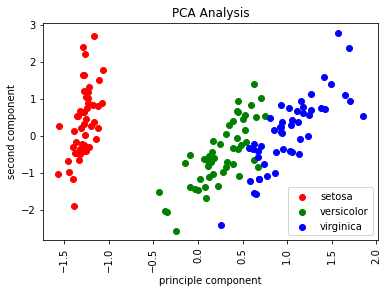

In [ ]:
color = ["red", "green", "blue"]   #3 farklı çiçek türü olduğu için 3 farklı renkle görselleştirilir.

for each in range(3): #3 farklı iris türü(setosa,versicolor,virginica) olduğu için range(3) denilir.
    plt.scatter(df.p1[df.sınıf==each],df.p2[df.sınıf==each], color=color[each], label=iris.target_names[each])
    
plt.legend()
plt.xlabel("principle component")
plt.ylabel("second component")
plt.title("PCA Analysis")
plt.xticks(rotation= 90)
plt.show()

Datada türler arasındaki ayrım gözle görülebilir şekildedir.